In [1]:
%run Main.ipynb
%run RedshiftDrift.ipynb
%run AlphaVariation.ipynb

# Redshift Drift + Alpha Variation
#### BEK0 ($\zeta_\Lambda = \zeta_m = 0$)
#### BEK ($\zeta_m = 0$ and $\zeta_\Lambda = +0.1$ppm)

In [2]:
#Redshift Drift Only
BEK_RedOnly_Liske = FisherMatrix_z(zLiske,unc_zLiske,h, OmegaM=0.3, w0=None, wa=None, NrYears=20, analysis = 'redshift')
BEK_RedOnly_Liske = add1DPriors(BEK_RedOnly_Liske, [[unch,0],[uncOmegaM,1]])
BEK_Red_Liske = np.copy(BEK_RedOnly_Liske)
BEK_Red_Liske = np.insert(BEK_Red_Liske, 2, 0, axis=0)
BEK_Red_Liske = np.insert(BEK_Red_Liske, 2, 0, axis=1)
BEK_Red_Liske = np.insert(BEK_Red_Liske, 3, 0, axis=0)
BEK_Red_Liske = np.insert(BEK_Red_Liske, 3, 0, axis=1)

In [3]:
#Alpha Variation Only Bekenstein (Zm=Zl=0)
BEK0Only_AlphaB = np.copy(BEK0_AlphaB)
BEK0_AlphaB = np.insert(BEK0_AlphaB, 0, 0, axis=0)
BEK0_AlphaB = np.insert(BEK0_AlphaB, 0, 0, axis=1)

BEK0Only_AlphaO = np.copy(BEK0_AlphaO)
BEK0_AlphaO = np.insert(BEK0_AlphaO, 0, 0, axis=0)
BEK0_AlphaO = np.insert(BEK0_AlphaO, 0, 0, axis=1)


#Alpha Variation Only Bekenstein (Zm=0 Zl=+0.1)
BEKOnly_AlphaB = np.copy(BEK_AlphaB)
BEK_AlphaB = np.insert(BEK_AlphaB, 0, 0, axis=0)
BEK_AlphaB = np.insert(BEK_AlphaB, 0, 0, axis=1)

BEKOnly_AlphaO = np.copy(BEK_AlphaO)
BEK_AlphaO = np.insert(BEK_AlphaO, 0, 0, axis=0)
BEK_AlphaO = np.insert(BEK_AlphaO, 0, 0, axis=1)

In [4]:
#Redshift Drift + Alpha Variation Bekenstein (Zm=Zl=0)
BEK0_RedAlphaB =  BEK_Red_Liske + BEK0_AlphaB
BEK0_RedAlphaO =  BEK_Red_Liske + BEK0_AlphaO

#Redshift Drift + Alpha Variation Bekenstein (Zm=0 Zl=+0.1)
BEK_RedAlphaB =  BEK_Red_Liske + BEK_AlphaB
BEK_RedAlphaO =  BEK_Red_Liske + BEK_AlphaO

In [5]:
#Priors Only Bekenstein (Zm=Zl=0)
PriorRedAlphaBEK0 = np.copy(PriorBEK0)
PriorRedAlphaBEK0 = np.insert(PriorRedAlphaBEK0, 0, 0, axis=0)
PriorRedAlphaBEK0 = np.insert(PriorRedAlphaBEK0, 0, 0, axis=1)
PriorRedAlphaBEK0 = add1DPriors(PriorRedAlphaBEK0, [[unch,0]])

#Priors Only Bekenstein (Zm=0 Zl=+0.1)
PriorRedAlphaBEK = np.copy(PriorBEK)
PriorRedAlphaBEK = np.insert(PriorRedAlphaBEK, 0, 0, axis=0)
PriorRedAlphaBEK = np.insert(PriorRedAlphaBEK, 0, 0, axis=1)
PriorRedAlphaBEK = add1DPriors(PriorRedAlphaBEK, [[unch,0]])

### Confidence ellipses (1-sigma)

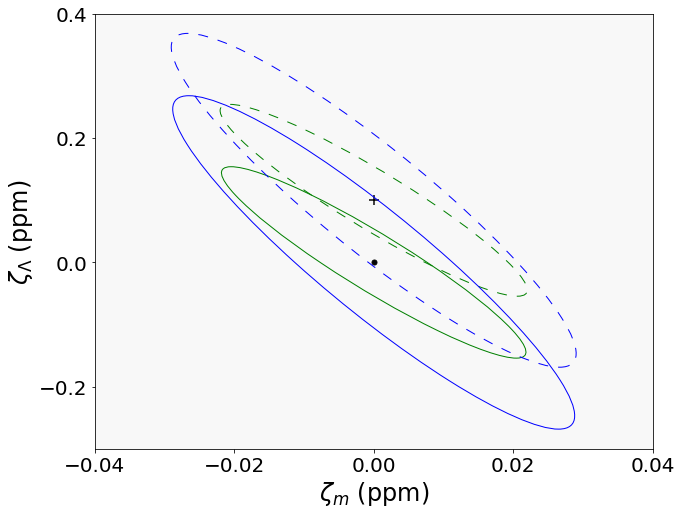

In [6]:
def BEKRedAlphaZlZm(Zl1,Zm1,Zl2,Zm2,Fs): 
    ells = []
    Priors1 = []
    Priors2 = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style, facecolor, alpha = 'blue', 'RedAlphaB_BEK0', '-', 'none', 1
            ells.append([Zl1,Zm1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK0_RedAlphaO:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='green', 'RedAlphaO_BEK0', '-', 'none', 1
            ells.append([Zl1,Zm1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaB:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='blue', 'RedAlphaB_BEK', (0, (10,10)), 'none', 1
            ells.append([Zl2,Zm2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaO:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='green', 'RedAlphaO_BEK', (0, (10,10)), 'none', 1
            ells.append([Zl2,Zm2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha]) 
            
        if Fs[i] is PriorRedAlphaBEK:
            Fm = marginalize(Fs[i],'OmegaM',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='grey', 'Prior', '-', 'grey', 0.05
            ells.append([Zl2,Zm2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        

    ellipses(ells,['$\zeta_m$ (ppm)','$\zeta_\Lambda$ (ppm)'])
    plt.xlim(-0.04,0.04)
    plt.ylim(-0.3,0.4)
    plt.scatter(Zl1,Zm1, color='black', marker='.', s=100)
    plt.scatter(Zl2,Zm2, color='black', marker='+',s=100)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=4)
    #plt.savefig('BEK_RedAlphaZlZm.png', dpi=300, bbox_inches='tight')
    plt.show()
    
BEKRedAlphaZlZm(0,0,0,0.1,[PriorRedAlphaBEK, BEK_RedAlphaO, BEK0_RedAlphaO, BEK0_RedAlphaB, BEK_RedAlphaB])

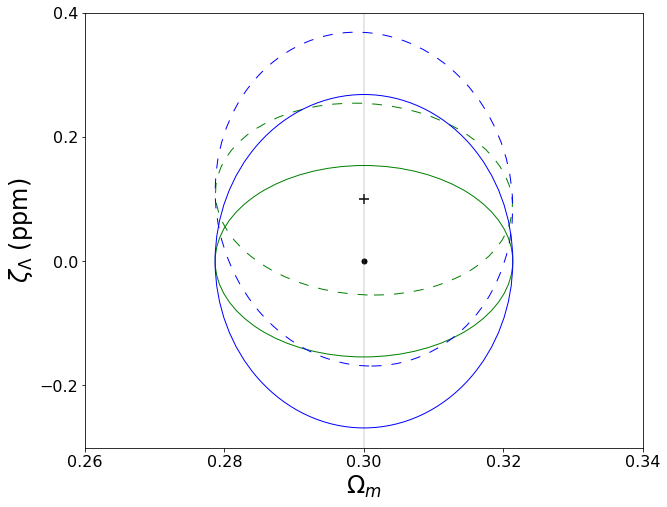

In [7]:
def BEKRedAlphaZlOmegaM(OmegaM,Zl1,Zl2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style, facecolor, alpha ='blue', 'RedAlphaB_BEK0', '-', 'none', 1
            ells.append([OmegaM,Zl1,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK0_RedAlphaO:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style, facecolor, alpha ='green', 'RedAlphaO_BEK0', '-', 'none', 1
            ells.append([OmegaM,Zl1,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaB:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style, facecolor, alpha ='blue', 'RedAlphaB_BEK', (0, (10,10)), 'none', 1
            ells.append([OmegaM,Zl2,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaO:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style, facecolor, alpha ='green', 'RedAlphaO_BEK', (0, (10,10)), 'none', 1
            ells.append([OmegaM,Zl2,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaBEK:
            Fm = marginalize(Fs[i],'Zm',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style, facecolor, alpha ='grey', 'Prior', '-', 'grey', 0.2
            ells.append([OmegaM,Zl2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
              

    ellipses(ells,['$\Omega_m$','$\zeta_\Lambda$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.26,0.34)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=4)
    plt.scatter(OmegaM,Zl1, color='black', marker='.', s=100)
    plt.scatter(OmegaM,Zl2, color='black', marker='+', s=100)
    plt.ylim(-0.3,0.4)
    plt.show()

BEKRedAlphaZlOmegaM(0.3,0,0.1,[PriorRedAlphaBEK,BEK_RedAlphaO, BEK0_RedAlphaO, BEK0_RedAlphaB, BEK_RedAlphaB])

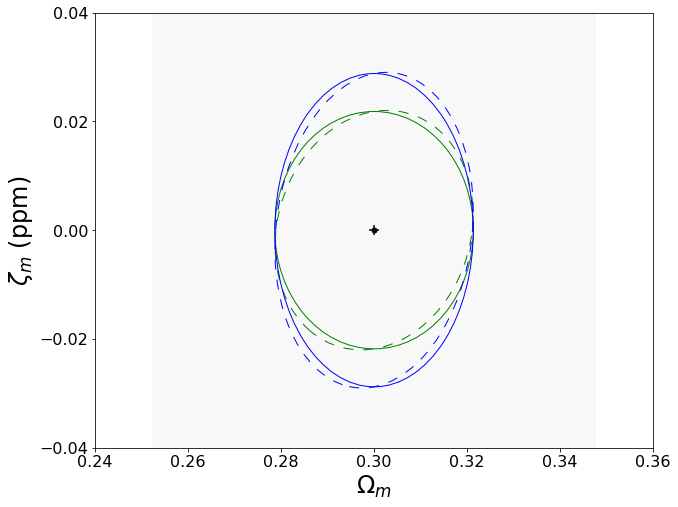

In [8]:
def BEKRedAlphaZmOmegaM(OmegaM,Zm1,Zm2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='blue', 'RedAlphaB_BEK0', '-', 'none', 1
            ells.append([OmegaM,Zm1,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK0_RedAlphaO:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='green', 'RedAlphaO_BEK0', '-', 'none', 1
            ells.append([OmegaM,Zm1,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaB:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='blue', 'RedAlphaB_BEK', (0, (10,10)), 'none', 1
            ells.append([OmegaM,Zm2,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaO:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='green', 'RedAlphaO_BEK', (0, (10,10)), 'none', 1
            ells.append([OmegaM,Zm2,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha]) 
            
        if Fs[i] is PriorRedAlphaBEK:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'h',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='grey', 'Prior', '-', 'grey', 0.05
            ells.append([OmegaM,Zm1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
              

    ellipses(ells,['$\Omega_m$','$\zeta_m$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.24,0.36)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.ylim(-0.04,0.04)
    plt.scatter(OmegaM,Zm1, color='black', marker='.', s=100)
    plt.scatter(OmegaM,Zm2, color='black', marker='+', s=100)
    #plt.savefig('BEK_RedAlphaZmOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()
    
BEKRedAlphaZmOmegaM(0.3,0,0,[PriorRedAlphaBEK,BEK_RedAlphaO, BEK0_RedAlphaO, BEK0_RedAlphaB, BEK_RedAlphaB])

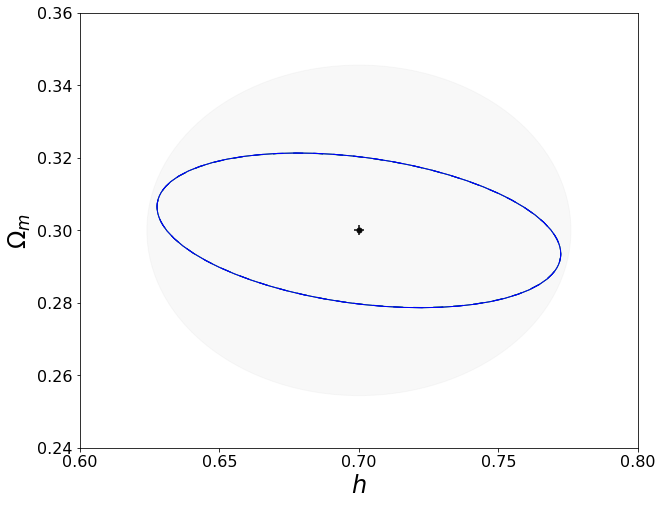

In [9]:
def BEKRedAlphahOmegaM(h,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is BEK0_RedAlphaB:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'Zm',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='blue', 'RedAlphaB_BEK0', '-', 'none', 1
            ells.append([h,OmegaM,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK0_RedAlphaO:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'Zm',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='green', 'RedAlphaO_BEK0', '-', 'none', 1
            ells.append([h,OmegaM,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaB:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'Zm',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='blue', 'RedAlphaB_BEK', (0, (10,10)), 'none', 1
            ells.append([h,OmegaM,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is BEK_RedAlphaO:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'Zm',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='green', 'RedAlphaO_BEK', (0, (10,10)), 'none', 1
            ells.append([h,OmegaM,Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha]) 
        
        if Fs[i] is PriorRedAlphaBEK:
            Fm = marginalize(Fs[i],'Zl',analysis='red+alpha-BEK')
            Fm = marginalize(Fm,'Zm',analysis='red+alpha-BEK')
            Pa = preelipse(Fm)
            color, name, style,facecolor, alpha ='grey', 'Prior', '-', 'grey', 0.05 
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
    
    ellipses(ells,['$h$','$\Omega_m$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(0.24,0.36)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(h,OmegaM, color='black', marker='.', s=100)
    plt.scatter(h,OmegaM, color='black', marker='+', s=100)
    #plt.savefig('BEK_RedAlphahOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()
    
BEKRedAlphahOmegaM(0.7,0.3,[PriorRedAlphaBEK,BEK_RedAlphaO, BEK0_RedAlphaO, BEK0_RedAlphaB, BEK_RedAlphaB])

#### - Table

In [10]:
def tableRedAlphaBEK(matrices):
    i=0
    df=pd.DataFrame()
    nformat = "{:.0f}"
    float_format="{:.3f}"

    for matrix in matrices:
        if matrix.all == BEK_RedAlphaB.all or matrix.all == BEK_RedAlphaO.all:  #RedshiftDrift+Alpha
            rows = {'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zl, Zm)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[0]),
                    'ρ(h, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zm, Ωm)': float_format.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zl, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zl, Zm)': float_format.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[1]),
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(Zm)':float_format.format(Sigmas(matrix)[2]),
                    'σ(Zl)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        elif matrix.all == BEKOnly_AlphaB.all or matrix.all == BEKOnly_AlphaO.all:   #Alpha Only
            rows = {'FoM(Ωm, h)': '-',
                'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl'],analysis='alpha-BEK')[0]),
                'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm'],analysis='alpha-BEK')[0]),
                'FoM(Zl, Zm)': nformat.format(FigMeriteRho(matrix,['OmegaM'],analysis='alpha-BEK')[0]),
                'ρ(h, Ωm)': '-',    
                'ρ(Zm, Ωm)': float_format.format(FigMeriteRho(matrix,['Zl'],analysis='alpha-BEK')[1]),
                'ρ(Zl, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm'],analysis='alpha-BEK')[1]),
                'ρ(Zl, Zm)': float_format.format(FigMeriteRho(matrix,['OmegaM'],analysis='alpha-BEK')[1]),
                'σ(h)': '-',
                'σ(Ωm)':float_format.format(Sigmas(matrix)[0]),
                'σ(Zm)':float_format.format(Sigmas(matrix)[1]),
                'σ(Zl)':float_format.format(Sigmas(matrix)[2])}
            i+=1
        
            df = df.append(rows,ignore_index=True)
            del rows
            
        elif matrix.all == BEK_RedOnly_Liske.all:  #RedshiftDrift Only
            rows = {'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,[],analysis='redshift')[0]),
                'FoM(Zm, Ωm)': '-',
                'FoM(Zl, Ωm)': '-',
                'FoM(Zl, Zm)': '-',
                'ρ(h, Ωm)': float_format.format(FigMeriteRho(matrix,[],analysis='redshift')[1]),
                'ρ(Zm, Ωm)': '-',
                'ρ(Zl, Ωm)': '-',
                'ρ(Zl, Zm)': '-', 
                'σ(h)': float_format.format(Sigmas(matrix)[0]),
                'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                'σ(Zm)':'-',
                'σ(Zl)':'-'}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
         
        elif matrix.all == PriorRedAlphaBEK.all or matrix.all == PriorRedAlphaBEK0.all:  #RedshiftDrift+Alpha
            rows = {'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zm, Ωm)': nformat.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zl, Ωm)': nformat.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[0]),
                    'FoM(Zl, Zm)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[0]),
                    'ρ(h, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm','Zl'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zm, Ωm)': float_format.format(FigMeriteRho(matrix,['Zl','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zl, Ωm)': float_format.format(FigMeriteRho(matrix,['Zm','h'],analysis='red+alpha-BEK')[1]),
                    'ρ(Zl, Zm)': float_format.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='red+alpha-BEK')[1]),
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(Zm)':float_format.format(Sigmas(matrix)[2]),
                    'σ(Zl)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
             
    
    Datasets = ['Liske','Baseline', 'Optimistic', 'Liske + Baseline','Liske + Optimistic', 'PriorsOnly']
    
    
    df.insert(0, "Parameters", Datasets, True)
    df = df.transpose()
          
    return df

In [11]:
matricesRedAlphaBEK = [BEK_RedOnly_Liske, BEKOnly_AlphaB, BEKOnly_AlphaO, BEK_RedAlphaB, BEK_RedAlphaO,PriorRedAlphaBEK]
tab1 = tableRedAlphaBEK(matricesRedAlphaBEK)

#See the table in DataFrame:
tab1

#Transform dataframe to latex code:
#print(tab1.to_latex(header=False,index=True))

/Users/catarinamarques/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: The matrices used can be singular (and only by python precision may FoM, rho and 1-sigma uncertainties be computed, which can be wrong). To check if the matrices are singular use the function SingularMatrix(Fm).
/Users/catarinamarques/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in double_scalars


,0,1,2,3,4,5
Parameters,Liske,Baseline,Optimistic,Liske + Baseline,Liske + Optimistic,PriorsOnly
"FoM(Ωm, h)",604,-,-,684,685,290
"FoM(Zm, Ωm)",-,766,1021,1635,2162,0
"FoM(Zl, Ωm)",-,82,145,176,306,inf
"FoM(Zl, Zm)",-,305,777,325,832,0
"ρ(h, Ωm)",-0.340,-,-,-0.305,-0.304,0.000
"ρ(Zm, Ωm)",-,0.251,0.270,0.121,0.131,0.000
"ρ(Zl, Ωm)",-,-0.107,-0.139,-0.050,-0.066,-0.000
"ρ(Zl, Zm)",-,-0.912,-0.930,-0.918,-0.935,1.000
σ(h),0.048,-,-,0.048,0.048,0.050


#### CPLT ($w_0 = -0.8$, $w_a = -0.2$ and $\zeta = -0.15$ppm)
#### CPLF ($w_0 = -0.9$, $w_a = +0.3$ and $\zeta = -0.15$ppm)

In [12]:
#Redshift Drift Only CPLT(w0=-0.8 wa=-0.2)
CPLT_LiskeOnly = CPLT_Liske
CPLT_Liske = np.insert(CPLT_Liske, 4, 0, axis=0)
CPLT_Liske = np.insert(CPLT_Liske, 4, 0, axis=1)


#Redshift Drift Only CPLF(w0=-0.9 wa=0.3)
CPLF_LiskeOnly = CPLF_Liske
CPLF_Liske = np.insert(CPLF_Liske, 4, 0, axis=0)
CPLF_Liske = np.insert(CPLF_Liske, 4, 0, axis=1)

In [13]:
#Alpha Variation Only CPLT(w0=-0.8 wa=-0.2)
CPL_AlphaBOnly_T = CPL_AlphaB_T
CPL_AlphaB_T = np.insert(CPL_AlphaB_T, 0, 0, axis=0)
CPL_AlphaB_T = np.insert(CPL_AlphaB_T, 0, 0, axis=1)

CPL_AlphaOOnly_T = CPL_AlphaO_T
CPL_AlphaO_T = np.insert(CPL_AlphaO_T, 0, 0, axis=0)
CPL_AlphaO_T = np.insert(CPL_AlphaO_T, 0, 0, axis=1)

#Alpha Variation Only CPLF(w0=-0.9 wa=0.3)
CPL_AlphaBOnly_F = CPL_AlphaB_F
CPL_AlphaB_F = np.insert(CPL_AlphaB_F, 0, 0, axis=0)
CPL_AlphaB_F = np.insert(CPL_AlphaB_F, 0, 0, axis=1)

CPL_AlphaOOnly_F = CPL_AlphaO_F
CPL_AlphaO_F = np.insert(CPL_AlphaO_F, 0, 0, axis=0)
CPL_AlphaO_F = np.insert(CPL_AlphaO_F, 0, 0, axis=1)

In [14]:
#Redshift Drift + Alpha Variation CPLT(w0=-0.8 wa=-0.2)
CPL_RedAlphaB_T =  CPLT_Liske + CPL_AlphaB_T
CPL_RedAlphaO_T =  CPLT_Liske + CPL_AlphaO_T

#Redshift Drift + Alpha Variation CPLF(w0=-0.9 wa=0.3)
CPL_RedAlphaB_F =  CPLF_Liske + CPL_AlphaB_F
CPL_RedAlphaO_F =  CPLF_Liske + CPL_AlphaO_F

In [15]:
#Priors Only CPLT(w0=-0.8 wa=-0.2)
PriorRedAlphaCPLT = np.copy(PriorCPLT)
PriorRedAlphaCPLT = np.insert(PriorRedAlphaCPLT, 0, 0, axis=0)
PriorRedAlphaCPLT = np.insert(PriorRedAlphaCPLT, 0, 0, axis=1)
PriorRedAlphaCPLT= add1DPriors(PriorRedAlphaCPLT, [[unch,0]])


#Priors Only CPLF(w0=-0.9 wa=0.3)
PriorRedAlphaCPLF = np.copy(PriorCPLF)
PriorRedAlphaCPLF = np.insert(PriorRedAlphaCPLF, 0, 0, axis=0)
PriorRedAlphaCPLF = np.insert(PriorRedAlphaCPLF, 0, 0, axis=1)
PriorRedAlphaCPLF= add1DPriors(PriorRedAlphaCPLF, [[unch,0]])

#### - Confidence ellipses (1-sigma)

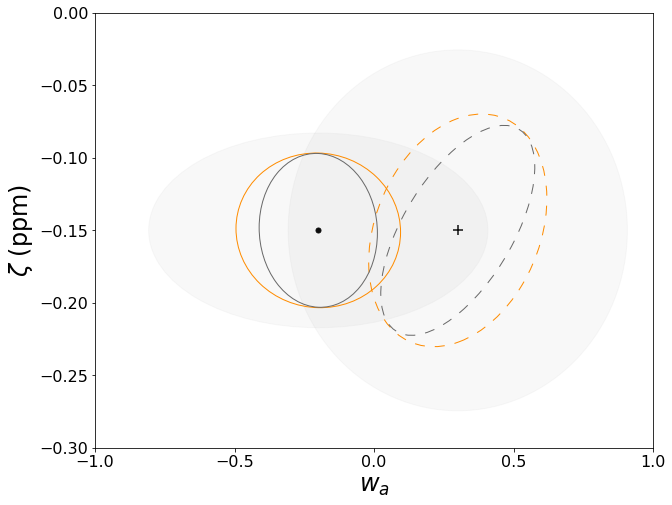

In [16]:
def CPLRedAlphazetawa(wa1,wa2,zeta1,zeta2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([wa1,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([wa1,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([wa2,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])   
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([wa2,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([wa1,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([wa2,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])

 
    ellipses(ells,['$w_a$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1,1)
    plt.ylim(-0.3,0.0)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(wa1,zeta1, color='black', marker='.', s=100)
    plt.scatter(wa2,zeta2, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaZetaWa.png', dpi=300, bbox_inches='tight')
    plt.show()
    
CPLRedAlphazetawa(-0.2,0.3,-0.15,-0.15, [PriorRedAlphaCPLT, PriorRedAlphaCPLF,CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F])    

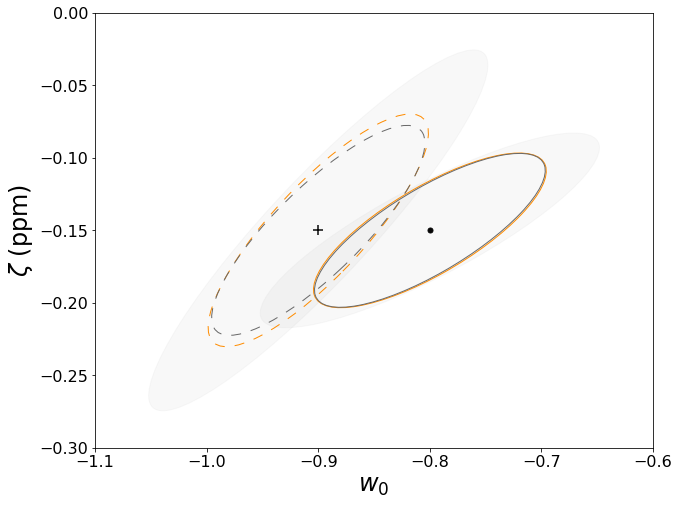

In [17]:
def CPLRedAlphazetaw0(w01,w02,zeta1,zeta2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([w01,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([w01,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
        
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([w02,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([w02,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
         
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([w01,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([w02,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        
    ellipses(ells,['$w_0$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1.1,-0.6)
    plt.ylim(-0.3,0.0)
    plt.scatter(w01,zeta1, color='black', marker='.', s=100)
    plt.scatter(w02,zeta2, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaZetaW0.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphazetaw0(-0.8,-0.9,-0.15,-0.15, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F])    

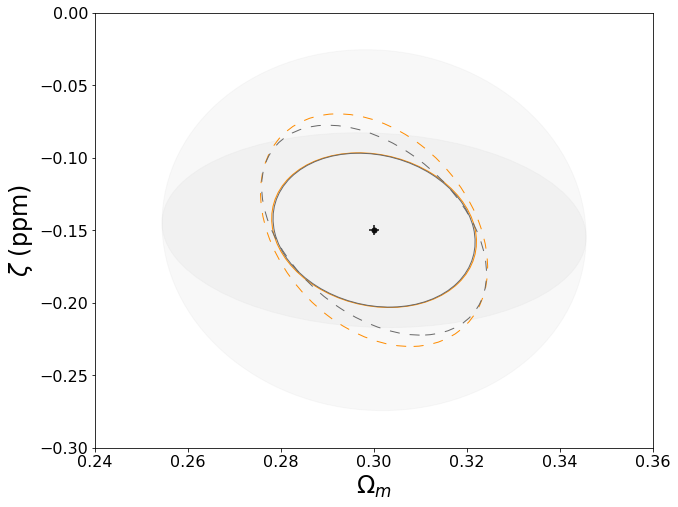

In [18]:
def CPLRedAlphazetaOmegaM(OmegaM,zeta1,zeta2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([OmegaM,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([OmegaM,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([OmegaM,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([OmegaM,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([OmegaM,zeta1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([OmegaM,zeta2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
    
    ellipses(ells,['$\Omega_m$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.locator_params(axis="x", nbins=8)
    plt.xlim(0.24,0.36)
    plt.ylim(-0.3,0.0)
    plt.scatter(OmegaM,zeta1, color='black', marker='.', s=100)
    plt.scatter(OmegaM,zeta2, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaZetaOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphazetaOmegaM(0.3,-0.15,-0.15, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F])    

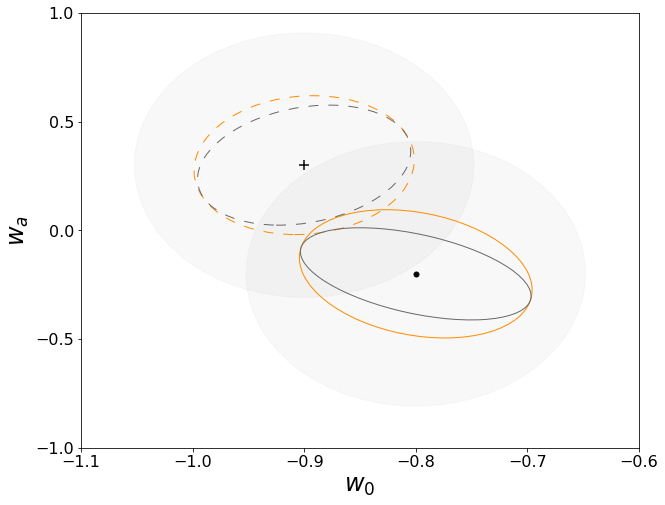

In [19]:
def CPLRedAlphaw0wa(w01,w02,wa1,wa2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            #print(Fs)
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([w01,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
             
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([w01,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([w02,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([w02,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([w01,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([w02,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
            
    ellipses(ells,['$w_0$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1.1,-0.6)
    plt.ylim(-1,1)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(w01,wa1, color='black', marker='.', s=100)
    plt.scatter(w02,wa2, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaw0wa.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphaw0wa(-0.8,-0.9,-0.2,0.3, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F])    

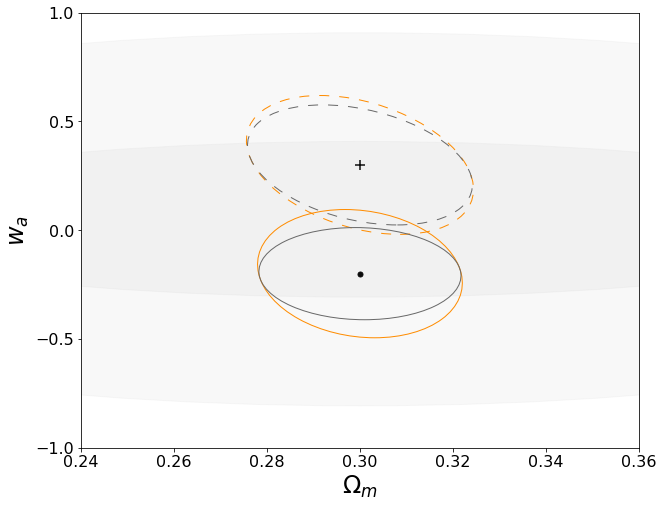

In [20]:
def CPLRedAlphaOmegaMwa(OmegaM,wa1,wa2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([OmegaM,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([OmegaM,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([OmegaM,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([OmegaM,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([OmegaM,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([OmegaM,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
          
    
    ellipses(ells,['$\Omega_m$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.24,0.36)
    plt.ylim(-1,1)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(OmegaM,wa1, color='black', marker='.', s=100)
    plt.scatter(OmegaM,wa2, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaOmegaMWa.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphaOmegaMwa(0.3,-0.2,0.3, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F]) 

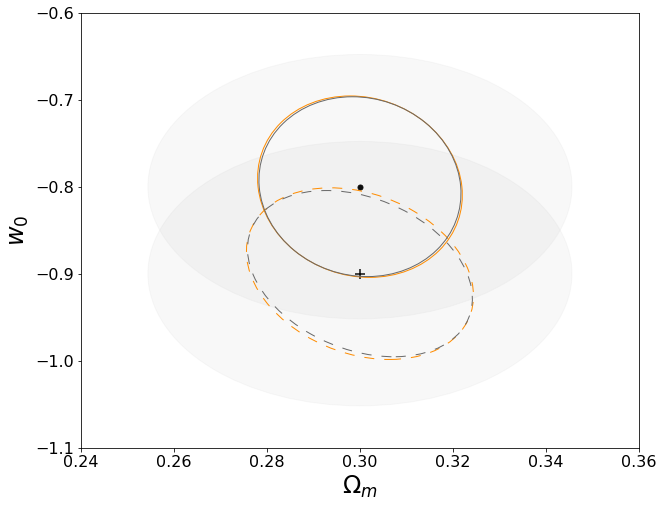

In [21]:
def CPLRedAlphaOmegaMw0(OmegaM,w01,w02,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([OmegaM,w01, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([OmegaM,w01, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([OmegaM,w02, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([OmegaM,w02, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])

        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([OmegaM,w01, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([OmegaM,w02, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
             
    
    ellipses(ells,['$\Omega_m$','$w_0$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.24,0.36)
    plt.ylim(-1.1,-0.6)
    plt.locator_params(axis="x", nbins=6)
    plt.scatter(OmegaM,w01, color='black', marker='.', s=100)
    plt.scatter(OmegaM,w02, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaOmegaMW0.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphaOmegaMw0(0.3,-0.8,-0.9, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F]) 

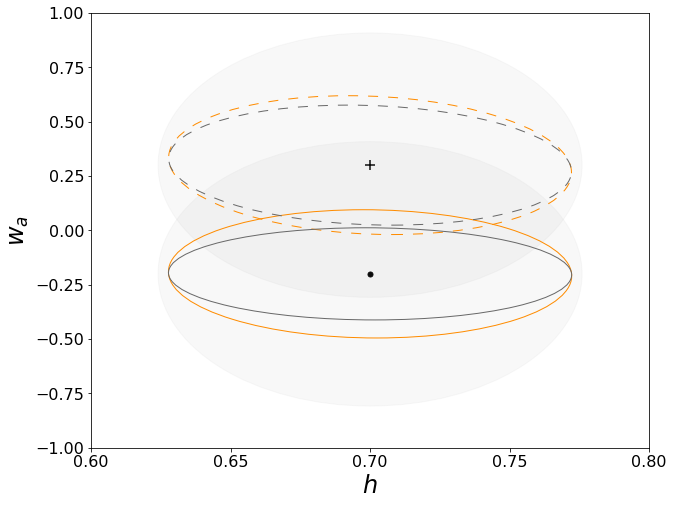

In [22]:
def CPLRedAlphahwa(h,wa1,wa2,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([h,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([h,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([h,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([h,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([h,wa1, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([h,wa2, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
    
    ellipses(ells,['$h$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(-1,1)
    plt.locator_params(axis="x", nbins=6)
    plt.scatter(h,wa1, color='black', marker='.', s=100)
    plt.scatter(h,wa2, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaHWa.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphahwa(0.7,-0.2,0.3, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F]) 

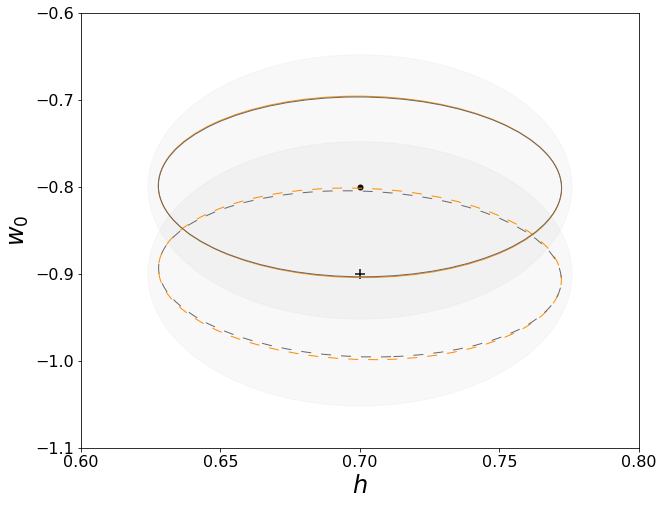

In [23]:
def CPLRedAlphahw0(h,w01,w02,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([h,w01, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([h,w01, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([h,w02, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([h,w02, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([h,w01, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([h,w02, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
    
    ellipses(ells,['$h$','$w_0$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(-1.1,-0.6)
    plt.locator_params(axis="x", nbins=6)
    plt.scatter(h,w01, color='black', marker='.', s=100)
    plt.scatter(h,w02, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaHW0.png', dpi=300, bbox_inches='tight')
    plt.show()
    
CPLRedAlphahw0(0.7,-0.8,-0.9, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F]) 

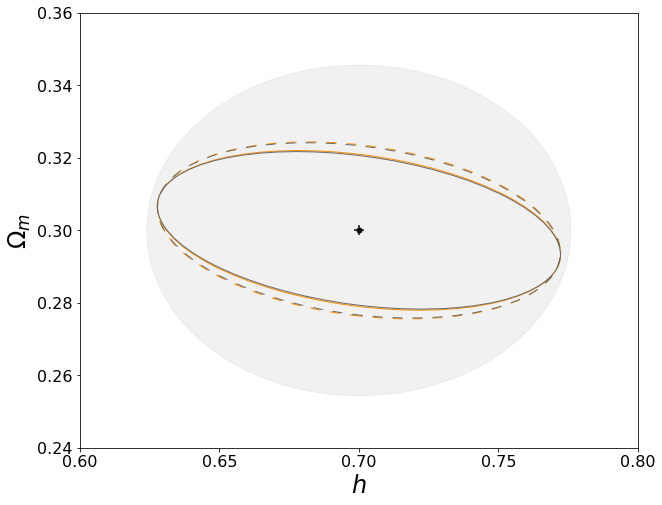

In [24]:
def CPLRedAlphahOmegaM(h,OmegaM,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLT', '-', 'none', 1
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLT', '-', 'none', 1
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'darkorange', 'RedAlphaB_CPLF', (0, (10,10)), 'none', 1
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'dimgrey', 'RedAlphaO_CPLF', (0, (10,10)), 'none', 1
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
               
        if Fs[i] is PriorRedAlphaCPLT:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorT', '-', 'grey', 0.05
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])

        if Fs[i] is PriorRedAlphaCPLF:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = 'grey', 'PriorF', '-', 'grey', 0.05
            ells.append([h,OmegaM, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
    
    ellipses(ells,['$h$','$\Omega_m$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(0.6,0.8)
    plt.ylim(0.24,0.36)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(h,OmegaM, color='black', marker='.', s=100)
    plt.scatter(h,OmegaM, color='black', marker='+', s=100)
    #plt.savefig('CPL_RedAlphaHOmegaM.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLRedAlphahOmegaM(0.7,0.3, [PriorRedAlphaCPLT, PriorRedAlphaCPLF, CPL_RedAlphaB_T, CPL_RedAlphaB_F, CPL_RedAlphaO_T, CPL_RedAlphaO_F]) 

#### - Table

In [25]:
def tableRedAlphaCPL(matrices):
    i=0
    df=pd.DataFrame()
    nformat = "{:.0f}"
    float_format="{:.3f}"

    for matrix in matrices:
        if matrix.all == CPL_RedAlphaB_T.all or matrix.all == CPL_RedAlphaO_T.all:
            rows = {'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[0]),
                    'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    
                    'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[1]),
                    'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, w0)': float_format.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, wa)': float_format.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                    'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                    'σ(zeta)':float_format.format(Sigmas(matrix)[4])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix.all == CPL_AlphaBOnly_T.all or matrix.all == CPL_AlphaOOnly_T.all:
            rows = {'FoM(Ωm, h)': '-',
                    'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa'],analysis='alpha-CPL')[0]),
                    'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0'],analysis='alpha-CPL')[0]),
                    'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM'],analysis='alpha-CPL')[0]),
                    'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0'],analysis='alpha-CPL')[0]),
                    'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='alpha-CPL')[0]),
                    'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='alpha-CPL')[0]),
                    
                    'ρ(Ωm, h)': '-',
                    'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','wa'],analysis='alpha-CPL')[1]),
                    'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','w0'],analysis='alpha-CPL')[1]),
                    'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['zeta','OmegaM'],analysis='alpha-CPL')[1]),
                    'ρ(zeta, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','w0'],analysis='alpha-CPL')[1]),
                    'ρ(zeta, w0)': float_format.format(FigMeriteRho(matrix,['wa','OmegaM'],analysis='alpha-CPL')[1]),
                    'ρ(zeta, wa)': float_format.format(FigMeriteRho(matrix,['w0','OmegaM'],analysis='alpha-CPL')[1]),
                    
                    'σ(h)': '-',
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[0]),
                    'σ(w0)':float_format.format(Sigmas(matrix)[1]),
                    'σ(wa)':float_format.format(Sigmas(matrix)[2]),
                    'σ(zeta)':float_format.format(Sigmas(matrix)[3])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
        if matrix.all == CPLT_LiskeOnly.all:
            rows = {'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['wa','w0'],analysis='redshift')[0]),
                    'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','h'],analysis='redshift')[0]),
                    'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['w0','h'],analysis='redshift')[0]),
                    'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='redshift')[0]),
                    'FoM(zeta, Ωm)': '-',
                    'FoM(zeta, w0)': '-',
                    'FoM(zeta, wa)': '-',
                    
                    'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,['wa','w0'],analysis='redshift')[1]),
                    'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','h'],analysis='redshift')[1]),
                    'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['w0','h'],analysis='redshift')[1]),
                    'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['OmegaM','h'],analysis='redshift')[1]),
                    'ρ(zeta, Ωm)': '-',
                    'ρ(zeta, w0)': '-',
                    'ρ(zeta, wa)': '-',
                    
                    'σ(h)': float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                    'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                    'σ(zeta)':'-'}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
            
            
    if matrix.all == matrix.all == PriorRedAlphaCPLT.all or matrix.all == PriorRedAlphaCPLT.all:
            rows = {'FoM(Ωm, h)': nformat.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[0]),
                    'FoM(w0, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, Ωm)': nformat.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(wa, w0)': nformat.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, Ωm)': nformat.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, w0)': nformat.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    'FoM(zeta, wa)': nformat.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[0]),
                    
                    'ρ(Ωm, h)': float_format.format(FigMeriteRho(matrix,['zeta','wa','w0'],analysis='red+alpha-CPL')[1]),
                    'ρ(w0, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','wa','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, Ωm)': float_format.format(FigMeriteRho(matrix,['zeta','w0','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(wa, w0)': float_format.format(FigMeriteRho(matrix,['zeta','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, Ωm)': float_format.format(FigMeriteRho(matrix,['wa','w0','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, w0)': float_format.format(FigMeriteRho(matrix,['wa','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    'ρ(zeta, wa)': float_format.format(FigMeriteRho(matrix,['w0','OmegaM','h'],analysis='red+alpha-CPL')[1]),
                    
                    'σ(h)':float_format.format(Sigmas(matrix)[0]),
                    'σ(Ωm)':float_format.format(Sigmas(matrix)[1]),
                    'σ(w0)':float_format.format(Sigmas(matrix)[2]),
                    'σ(wa)':float_format.format(Sigmas(matrix)[3]),
                    'σ(zeta)':float_format.format(Sigmas(matrix)[4])}
            i+=1
            df = df.append(rows,ignore_index=True)
            del rows
    
    Datasets = ['Liske','Baseline', 'Optimistic','Liske + Baseline','Liske + Optimistic', 'PriorsOnly']
    df.insert(0, "Parameters", Datasets, True)
    df = df.transpose()
    
            
    return df

In [26]:
matricesRedAlphaCPL= [CPLT_LiskeOnly, CPL_AlphaBOnly_T, CPL_AlphaOOnly_T, CPL_RedAlphaB_T, CPL_RedAlphaO_T, PriorRedAlphaCPLT]

tab1 = tableRedAlphaCPL(matricesRedAlphaCPL)

#See the table in DataFrame:
tab1

#Transform dataframe to latex code:
#print(tab1.to_latex(header=False,index=True))

/Users/catarinamarques/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: The matrices used can be singular (and only by python precision may FoM, rho and 1-sigma uncertainties be computed, which can be wrong). To check if the matrices are singular use the function SingularMatrix(Fm).


,0,1,2,3,4,5
Parameters,Liske,Baseline,Optimistic,Liske + Baseline,Liske + Optimistic,PriorsOnly
"FoM(Ωm, h)",529,-,-,662,673,290
"FoM(w0, Ωm)",252,149,151,439,449,145
"FoM(wa, Ωm)",69,62,88,156,218,36
"FoM(wa, w0)",12,20,35,34,52,11
"FoM(zeta, Ωm)",-,331,333,865,881,329
"FoM(zeta, w0)",-,196,201,281,291,186
"FoM(zeta, wa)",-,43,63,64,89,25
"ρ(Ωm, h)",-0.303,-,-,-0.301,-0.309,0.000
"ρ(w0, Ωm)",-0.189,0.005,0.007,-0.094,-0.074,0.000


#### - Comparison Alpha Only - Red+Alpha

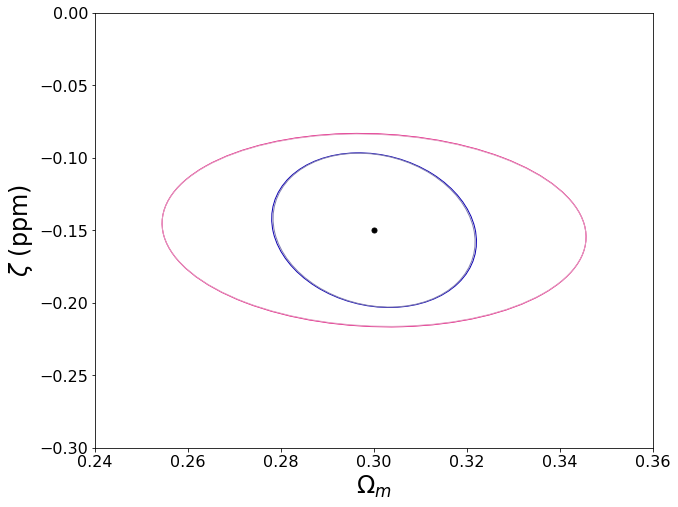

In [27]:
def CPLzetaOmegaMComp(OmegaM,zeta,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaBOnly_T:
            Fm = marginalize(Fs[i],'wa',analysis='alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#e30075', 'AlphaB_CPLT', '-', 'none', 1
            ells.append([OmegaM,zeta, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
            
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#0c00b3', 'RedAlphBO_CPLT', '-', 'none', 1
            ells.append([OmegaM,zeta, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
            
            
        if Fs[i] is CPL_AlphaOOnly_T:
            Fm = marginalize(Fs[i],'wa',analysis='alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#e39fc2', 'AlphaB_CPLT', '-', 'none', 1
            ells.append([OmegaM,zeta, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
        
            
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'wa',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'w0',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#817db3', 'RedAlphBO_CPLT', '-', 'none', 1
            ells.append([OmegaM,zeta, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  

        
        
    
    ellipses(ells,['$\Omega_m$','$\zeta$ (ppm)'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.locator_params(axis="x", nbins=8)
    plt.xlim(0.24,0.36)
    plt.ylim(-0.3,0.0)
    plt.scatter(OmegaM,zeta, color='black', marker='.', s=100)
    #plt.scatter(OmegaM,zeta, color='black', marker='+', s=100)
    #plt.savefig('figure3a.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLzetaOmegaMComp(0.3,-0.15, [CPL_RedAlphaB_T, CPL_AlphaBOnly_T, CPL_RedAlphaO_T, CPL_AlphaOOnly_T])

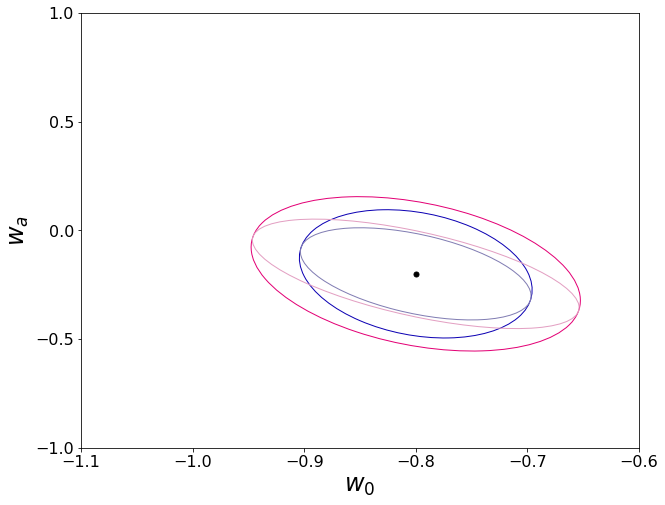

In [28]:
def CPLw0waComp(w0,wa,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaBOnly_T:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#e30075', 'AlphaB_CPLT', '-', 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
            
        if Fs[i] is CPL_RedAlphaB_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#0c00b3', 'RedAlphBO_CPLT', '-', 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
    
        if Fs[i] is CPL_AlphaOOnly_T:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#e39fc2', 'AlphaB_CPLT', '-', 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
    
    
        if Fs[i] is CPL_RedAlphaO_T:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#817db3', 'RedAlphBO_CPLT', '-', 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
    
    
    ellipses(ells,['$w_0$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1.1,-0.6)
    plt.ylim(-1,1)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(w0,wa, color='black', marker='.', s=100)
    #plt.savefig('figure3c.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLw0waComp(-0.8,-0.2, [CPL_RedAlphaB_T, CPL_AlphaBOnly_T, CPL_RedAlphaO_T, CPL_AlphaOOnly_T])

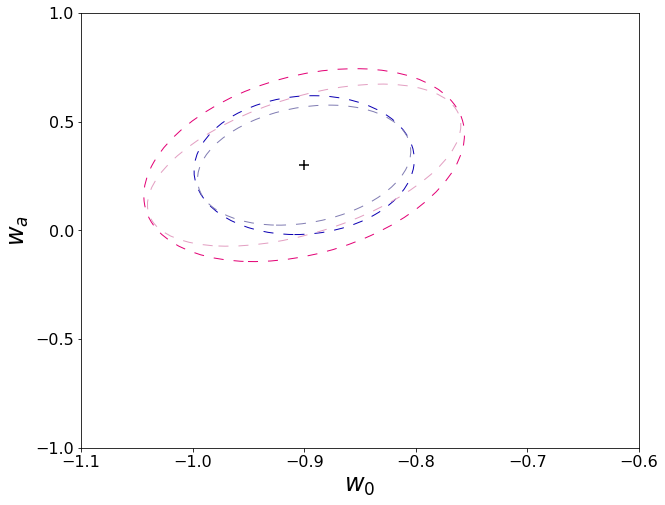

In [29]:
def CPLw0waComp2(w0,wa,Fs): 
    ells = []
    for i in range(len(Fs)):
        if Fs[i] is CPL_AlphaBOnly_F:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#e30075', 'AlphaB_CPLT', (0, (10,10)), 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
            
            
        if Fs[i] is CPL_RedAlphaB_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#0c00b3', 'RedAlphBO_CPLT', (0, (10,10)), 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
            
    
        if Fs[i] is CPL_AlphaOOnly_F:
            Fm = marginalize(Fs[i],'zeta',analysis='alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#e39fc2', 'AlphaB_CPLT', (0, (10,10)), 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])
    
    
        if Fs[i] is CPL_RedAlphaO_F:
            Fm = marginalize(Fs[i],'zeta',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'OmegaM',analysis='red+alpha-CPL')
            Fm = marginalize(Fm,'h',analysis='red+alpha-CPL')
            Pa = preelipse(Fm)
            color,name,style,facecolor, alpha = '#817db3', 'RedAlphBO_CPLT', (0, (10,10)), 'none', 1
            ells.append([w0,wa, Pa[0],Pa[1],Pa[2],name,color,style,facecolor, alpha])  
    
    
    ellipses(ells,['$w_0$','$w_a$'])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(-1.1,-0.6)
    plt.ylim(-1,1)
    plt.locator_params(axis="y", nbins=6)
    plt.scatter(w0,wa, color='black', marker='+', s=100)
    #plt.savefig('figure3d.png', dpi=300, bbox_inches='tight')
    plt.show()

CPLw0waComp2(-0.9,0.3, [CPL_RedAlphaB_F, CPL_AlphaBOnly_F, CPL_RedAlphaO_F, CPL_AlphaOOnly_F])